In [47]:
import pandas as pd
import seaborn as sns
import pickle
import json

In [3]:
!ls /shared/suryansh.tiwari/final_out

final_output1_1.csv  final_output_1.csv
final_output1_2.csv  final_output_2.csv


In [4]:
final_output1_1 = pd.read_csv("/shared/suryansh.tiwari/final_out/final_output1_1.csv", header=None)
na_nl_more = pd.read_csv(filepath_or_buffer="/home/karan.verma/more_data_na_nl.csv")
final_output1_1.columns = ["TAG", "Text_id", "GT", "Predicted_text", "GT_len", "Edits", "WER", "WER*GT_len", "char_len", "char_edits", "CER", "CER*char_len", "Confidence"]
z_intersection = pd.merge(final_output1_1, na_nl_more, on='Text_id', how='inner')

In [5]:
na_nl_more.columns

Index(['Tag', 'Text_id', 'Type_of_text', 'Raw_GT', 'GT', 'GT(english)',
       'utf_text', 'Machine_Transcribed_text',
       'Machine_Transcribed_text(English)', 'GT_len', 'Total_edit', 'WER',
       'WER*GT_len', 'GT_char_len', 'Total_char_edit', 'CER',
       'CER*GT_char_len', 'confidence', 'audio_path', 'HI_FA_EP6', '3',
       'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24',
       'multi_speaker_replaced_by_wildcard', 'Unnamed: 26'],
      dtype='object')

In [6]:
final_output1_1.head()

,TAG,Text_id,GT,Predicted_text,GT_len,Edits,WER,WER*GT_len,char_len,char_edits,CER,CER*char_len,Confidence
0,3_HI_FA,46099089,_,में हनी सोबाकोव,1,0.0,0.0,0.0,1,0.0,0.0,0.0,0.000000
1,3_HI_FA_EP6,46099089,_,महामाया,1,0.0,0.0,0.0,1,0.0,0.0,0.0,0.000000
2,3_HI_FA,45730577,सेट टॉप बॉक्स _ रैक _,सेट टॉप बॉक्स रैक,4,0.0,0.0,0.0,44,0.0,0.0,0.0,0.706857
3,3_HI_FA_EP6,45730577,सेट टॉप बॉक्स _ रैक _,सेट टॉप बॉक्स रैक,4,0.0,0.0,0.0,44,0.0,0.0,0.0,0.706857
4,3_HI_FA,45549153,फोन वॉच एप्पल फोन वॉच _,फोन वॉच एप्पल फोन वॉच कनानमाला ने में है खामिय...,5,0.0,0.0,0.0,55,0.0,0.0,0.0,0.426354


In [7]:
cer_1 = z_intersection.loc[((z_intersection.CER_y == 1.0) |  (z_intersection.CER_x == 1.0))]

In [38]:
cer_from_different_runs = cer_1.loc[cer_1.TAG == '3_HI_FA_EP6'][['Text_id', 'CER_x', 'CER_y', 'Machine_Transcribed_text', 'Predicted_text', 'TAG', 'GT_x', 'char_len', 'audio_path']]

In [56]:
list(cer_from_different_runs.audio_path)

['api_EN_S_10Aug20/app_1575174826_3808878238097211392.flac',
 'api_EN_S_04Aug20/app_182932094_3804538299188510720.flac',
 'api_EN_S_30Jul20/app_1591133591_3800996458467950848.flac',
 'api_HI_S_10Aug20/app_901840790_3808877567369281792.flac',
 'api_EN_S_18Aug20/app_1940825108_3814862229233205504.flac',
 'api_HI_S_30Jul20/app_225034745_3800992647456227328.flac',
 'api_EN_S_10Aug20/app_1970548500_3808877342789468160.flac',
 'api_HI_S_06Aug20/app_278898886_3805997379966992640.flac',
 'api_HI_S_07Aug20/app_249218244_3806746633471787264.flac',
 'api_HI_S_17Aug20/app_1769651427_3814389413085970688.flac',
 'api_HI_S_10Aug20/app_1415252531_3808880381252337920.flac',
 'api_HI_S_23Aug20/app_96344314_3818713951668011776.flac',
 'api_HI_S_29Jul20/app_143385435_3800206054453673984.flac',
 'api_HI_S_23Aug20/app_873646090_3818711989295776768.flac',
 'api_EN_S_04Aug20/app_1391138991_3804538551660445696.flac',
 'api_HI_S_10Aug20/app_1568057206_3808874532790337536.flac',
 'api_HI_S_03Aug20/app_1187480658

In [40]:
cer_is_different = cer_from_different_runs[cer_from_different_runs.CER_x != cer_from_different_runs.CER_y]

In [58]:
list(cer_is_different[c)

['Text_id',
 'CER_x',
 'CER_y',
 'Machine_Transcribed_text',
 'Predicted_text',
 'TAG',
 'GT_x',
 'char_len',
 'audio_path']

In [61]:
cer_is_different

,Text_id,CER_x,CER_y,Machine_Transcribed_text,Predicted_text,TAG,GT_x,char_len,audio_path
865,45549759,1.00,0.000000,एडिडास शूज,NaN,3_HI_FA_EP6,एडिडास शूज _,28,api_EN_S_10Aug20/app_1575174826_38088782380972...
987,45360379,1.00,0.096774,वूमेन नाइंटी,NaN,3_HI_FA_EP6,वूमेन नाइटी,31,api_EN_S_04Aug20/app_182932094_380453829918851...
1099,45224720,1.00,0.116279,प्लाईवुड दर्जा,NaN,3_HI_FA_EP6,प्लाईवुड दरवाजा,43,api_EN_S_30Jul20/app_1591133591_38009964584679...
1149,45549344,1.00,0.000000,इमरजेंसी लाइट बल्ब फिलिप्स,NaN,3_HI_FA_EP6,इमरजेंसी लाइट बल्ब फिलिप्स,72,api_HI_S_10Aug20/app_901840790_380887756736928...
1321,45731618,1.00,0.107143,बाइसिकिल लाइट्स फ्लाइट,NaN,3_HI_FA_EP6,बाइसिकल लाइट्स लाइट,56,api_EN_S_18Aug20/app_1940825108_38148622292332...
1371,45224777,1.00,0.076923,लेडीज कूल कुटकी वर्क कुर्ती,NaN,3_HI_FA_EP6,लेडीज _ कुर्ती वर्क कुर्ती,65,api_HI_S_30Jul20/app_225034745_380099264745622...
1427,45484211,1.00,0.250000,ग्लेन लोकेट,NaN,3_HI_FA_EP6,गले का लॉकेट _,32,api_HI_S_06Aug20/app_278898886_380599737996699...
1505,45545677,1.00,0.000000,लाइट वाली,NaN,3_HI_FA_EP6,_ लाइट वाली,25,api_HI_S_07Aug20/app_249218244_380674663347178...
1723,45726601,1.00,0.000000,बड़ा कंप्रेसर मशीन,NaN,3_HI_FA_EP6,बड़ा कंप्रेसर मशीन,50,api_HI_S_17Aug20/app_1769651427_38143894130859...
2061,45966242,1.00,0.000000,बाइक,NaN,3_HI_FA_EP6,बाइक,12,api_HI_S_23Aug20/app_96344314_3818713951668011...


In [60]:
list(cer_is_different.audio_path)

['api_EN_S_10Aug20/app_1575174826_3808878238097211392.flac',
 'api_EN_S_04Aug20/app_182932094_3804538299188510720.flac',
 'api_EN_S_30Jul20/app_1591133591_3800996458467950848.flac',
 'api_HI_S_10Aug20/app_901840790_3808877567369281792.flac',
 'api_EN_S_18Aug20/app_1940825108_3814862229233205504.flac',
 'api_HI_S_30Jul20/app_225034745_3800992647456227328.flac',
 'api_HI_S_06Aug20/app_278898886_3805997379966992640.flac',
 'api_HI_S_07Aug20/app_249218244_3806746633471787264.flac',
 'api_HI_S_17Aug20/app_1769651427_3814389413085970688.flac',
 'api_HI_S_23Aug20/app_96344314_3818713951668011776.flac',
 'api_HI_S_23Aug20/app_873646090_3818711989295776768.flac',
 'api_HI_S_10Aug20/app_1568057206_3808874532790337536.flac',
 'api_HI_S_03Aug20/app_1187480658_3803853215573737728.flac',
 'api_EN_S_06Aug20/app_824116820_3805998504568946688.flac',
 'api_HI_S_06Aug20/app_368226045_3805995964850766080.flac',
 'api_EN_S_04Aug20/app_1870371502_3804535257462472960.flac',
 'api_EN_S_26Aug20/app_1371881421_

In [37]:
cer_is_different.shape

(26, 8)

In [29]:
cer_is_different.shape

(26, 8)

<AxesSubplot:xlabel='Confidence'>

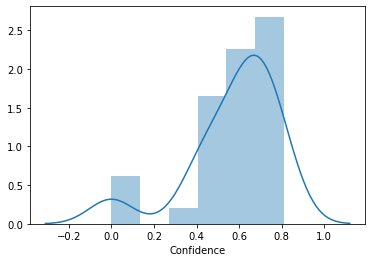

In [39]:
sns.distplot(cer_1.loc[cer_1.TAG == '3_HI_FA_EP6'].Confidence)

In [54]:
smax_path_hi_fa_file = '/shared/suryansh.tiwari/random_4k_vs_ouput/HI_FA_app_1870371502_3804535257462472960_smax.pkl'
smax_path_hi_fa_ep6_file =  "/shared/suryansh.tiwari/random_4k_vs_ouput/HI_FA_EP6_app_1870371502_3804535257462472960_smax.pkl"
smax_doubt_file = "/shared/suryansh.tiwari/doubtful_smax.pkl"
# smax_path = '/shared/suryansh.tiwari/random_4k_vs_ouput/HI_FA_EP6_app_948603124_3819926112914375680_smax.pkl'
# smax_path = '/shared/suryansh.tiwari/debugging_lm3/attempt_5/app_1028305151_3818713832440726528_softmax.pkl'

with open(smax_path_hi_fa_file, "rb") as f_smax_hi_fa:
    smax_path_hi_fa = pickle.load(f_smax_hi_fa, encoding='bytes')


with open(smax_path_hi_fa_ep6_file, "rb") as f_smax_hi_fa_ep6:
    smax_path_hi_fa_ep6 = pickle.load(f_smax_hi_fa_ep6, encoding='bytes')

with open(smax_doubt_file, "rb") as f_smax_doubt:
    smax_doubt = pickle.load(f_smax_doubt, encoding='bytes')


<AxesSubplot:>

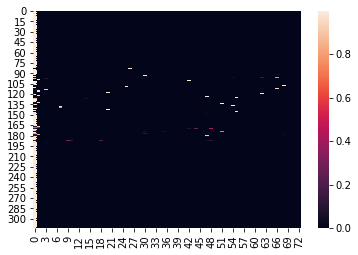

In [51]:
sns.heatmap(smax_path_hi_fa)

<AxesSubplot:>

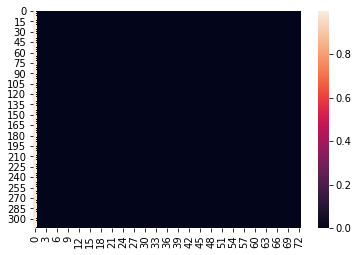

In [52]:
sns.heatmap(smax_path_hi_fa_ep6)

<AxesSubplot:>

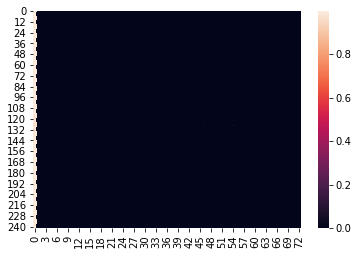

In [55]:
sns.heatmap(smax_doubt)